# Advanced ML Pipeline - House Price Prediction

<i>Implement a training + evaluation experiment for the house price prediction Kaggle problem.
Since the dataset contains many columns, read their descriptions and choose (and explain) which columns you are including in your answer. You should include at least 15 columns, and aim for the columns which are most useful for predicting the target (houseprice).

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.utils import estimator_html_repr
from IPython.core.display import HTML
from sklearn.compose import ColumnTransformer
from math import sqrt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')  #just to ignore warnings related to graphs and other codes.


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
print(f'There are {len(df.columns)} columns in the dataset.')

There are 81 columns in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
pd.set_option('display.max_rows',None)

In [18]:
df.isna().sum() #I will choose columns for my model with zero or least amount of missing values (And with common sense)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [19]:
df=df[['MSSubClass', 'MSZoning', 'LotArea', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt','RoofStyle','Foundation','Heating','HeatingQC','Electrical','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','YrSold', 'SaleType',
       'SaleCondition','SalePrice']] 
#I preferred to choose 26 columns excluding the target column for the model

In [20]:
df.isna().sum() #As we can see, only one columns has 1 missing value.

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
RoofStyle        0
Foundation       0
Heating          0
HeatingQC        0
Electrical       1
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  OverallCond    1460 non-null   int64 
 14  YearBuilt      1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  Heating        1460 non-null   object
 18  HeatingQC      1460 non-null

In [22]:
pd.set_option('display.max_rows',20)

In [23]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Heating,HeatingQC,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Ex,SBrkr,3,1,Gd,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,GasA,Ex,SBrkr,3,1,TA,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Ex,SBrkr,3,1,Gd,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,GasA,Gd,SBrkr,3,1,Gd,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,GasA,Ex,SBrkr,4,1,Gd,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,GasA,Ex,SBrkr,3,1,TA,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,GasA,TA,SBrkr,3,1,TA,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,GasA,Ex,SBrkr,4,1,Gd,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,GasA,Gd,FuseA,2,1,Gd,2010,WD,Normal,142125


<b> I will just use simple imputer for the 1 missing value for the electrical column.

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='most_frequent')
df[['Electrical']] = imputer.fit_transform(df[['Electrical']])

## <i>  <font size=5> EDA

In [26]:
df.info()  # Most of our columns are object dtype, we have few columns with numeric values. Meaning, we will definitely need OHE.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  OverallCond    1460 non-null   int64 
 14  YearBuilt      1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  Heating        1460 non-null   object
 18  HeatingQC      1460 non-null

In [27]:
df.isna().sum().sum() #so, we are all good, we have no missing data in our dataset for the model.

0

In [28]:
df.describe() #describe doesn't provide much of useful insights in case of the dataset

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,2.866438,1.046575,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,0.815778,0.220338,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,2.000000,1.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,3.000000,1.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,3.000000,1.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,8.000000,3.000000,2010.000000,755000.000000


In [29]:
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,KitchenAbvGr,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,-0.023438,0.281721,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.119690,-0.017784,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.101676,-0.183882,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.012980,-0.087001,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,-0.070651,-0.174800,-0.013618,0.522897
BedroomAbvGr,-0.023438,0.119690,0.101676,0.012980,-0.070651,1.000000,0.198597,-0.036014,0.168213
KitchenAbvGr,0.281721,-0.017784,-0.183882,-0.087001,-0.174800,0.198597,1.000000,0.031687,-0.135907
YrSold,-0.021407,-0.014261,-0.027347,0.043950,-0.013618,-0.036014,0.031687,1.000000,-0.028923
SalePrice,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.168213,-0.135907,-0.028923,1.000000


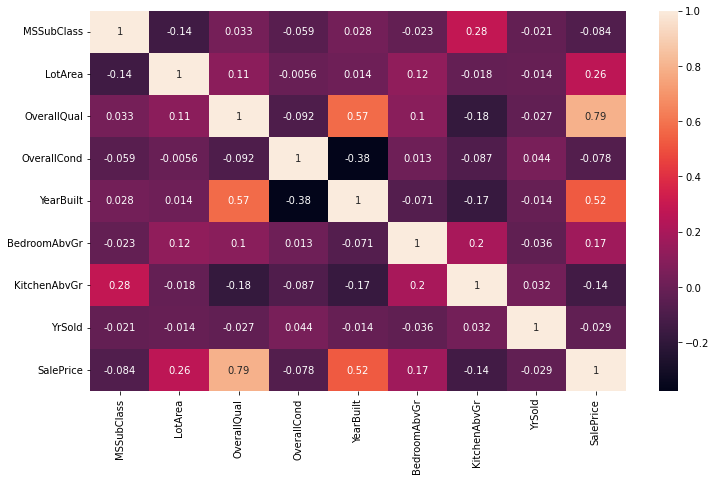

In [30]:
x = df.corr()
fig = plt.figure(figsize=(12,7))
ax = sns.heatmap(x,annot=True)            #we can see, there is strong positive relationship between Overall Quality and the SalePrice columns.

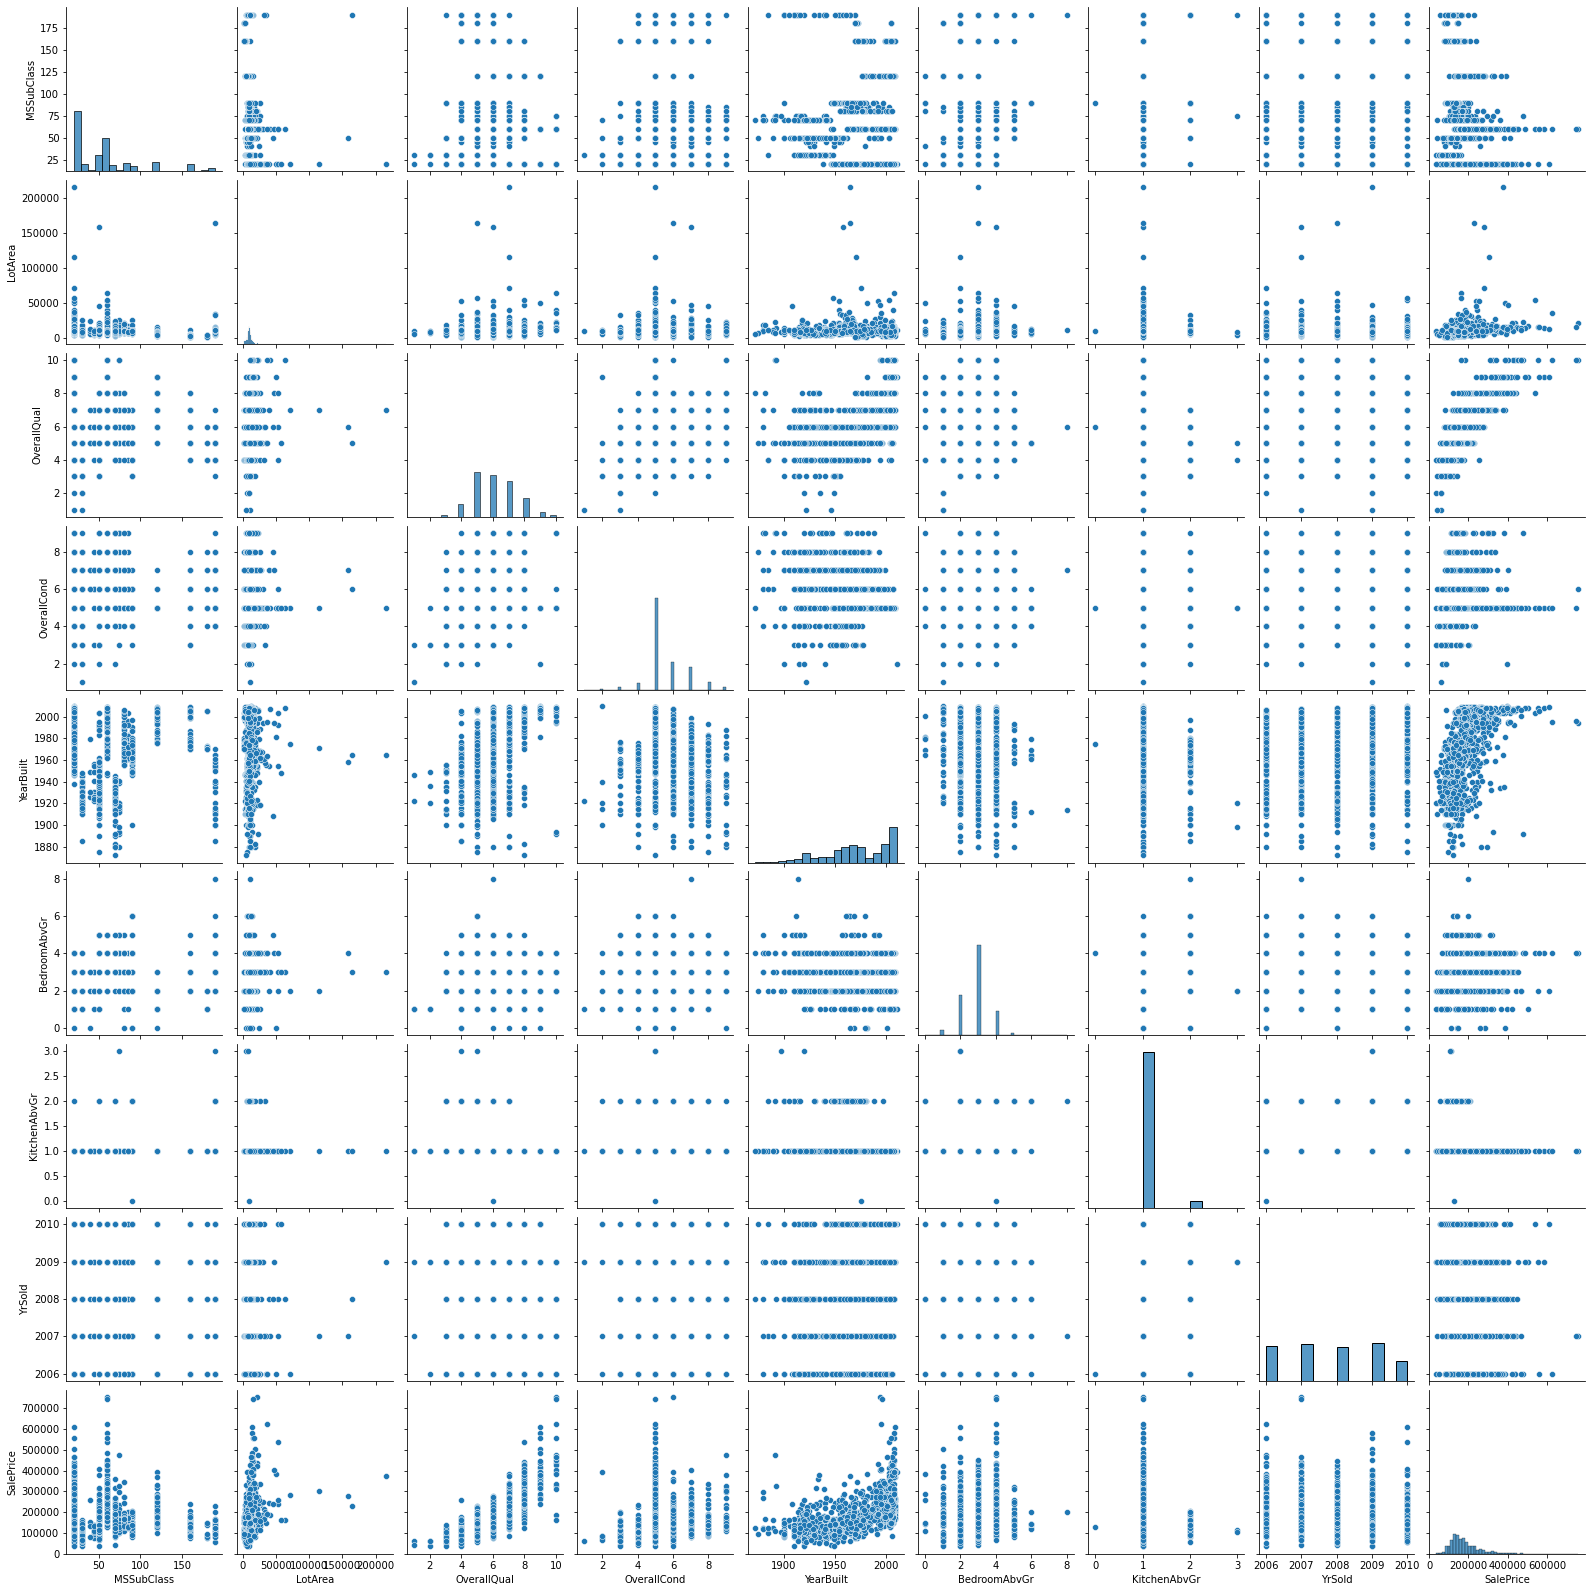

In [31]:
sns.pairplot(df)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

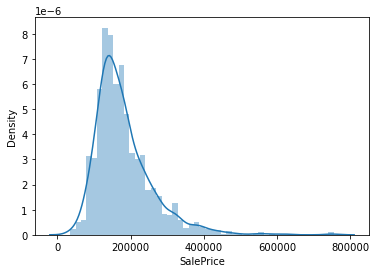

In [32]:
sns.distplot(df['SalePrice']) #slightly skewed to the right

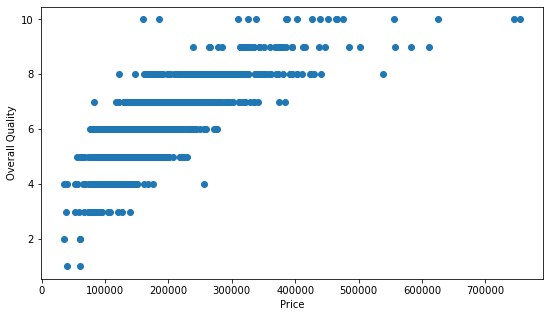

In [33]:
x = df['SalePrice']
y = df['OverallQual']
fig = plt.figure(figsize=(9,5))
plt.xlabel('Price')
plt.ylabel('Overall Quality')
plt.scatter(x, y)

## Building and evaluating regression models

In [36]:
scaler = StandardScaler()
# df[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','KitchenAbvGr','YrSold','SalePrice']] = \
# scaler.fit_transform(df[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','KitchenAbvGr','YrSold','SalePrice']])

df[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','KitchenAbvGr','YrSold']] = \
scaler.fit_transform(df[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','KitchenAbvGr','YrSold']])

**I preferred not to Scale the target column, 'SalePrice'**

In [47]:
X = pd.get_dummies(df.drop('SalePrice',axis=1), drop_first=True)
y = df["SalePrice"]

## KNN Regressor

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [49]:
knn = KNeighborsRegressor(n_neighbors=3)

In [50]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
pred=knn.predict(X_test)

In [52]:
print("MSE is:" ,mean_squared_error(y_test, pred))
print("RMSE is:" ,sqrt(mean_squared_error(y_test, pred)))
print("MAE is:" ,mean_absolute_error(y_test, pred))
print("R2 is:" ,r2_score(y_test, pred))

MSE is: 1632750872.7204463
RMSE is: 40407.31211947222
MAE is: 26912.509893455095
R2 is: 0.7660176362404357


In [53]:
mean_squared_error(np.log(y_test), np.log(pred), squared=False)  #In Kaggle log of RMSE is required to be find

0.20597984761032345

### Elbow Method

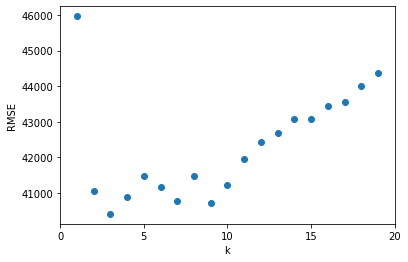

In [54]:
from math import sqrt
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(sqrt(mean_squared_error(y_test, knn.predict(X_test))))

plt.figure()
plt.xlabel('k')
plt.ylabel('RMSE')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

We can see that the optimal value for number of neighbors is 3. We have the least amount of **RMSE** for our model. This is the manual way for\
identifying the optimal value for n_neighbors. Next, I will use GridSearch in order to reduce the manual work.

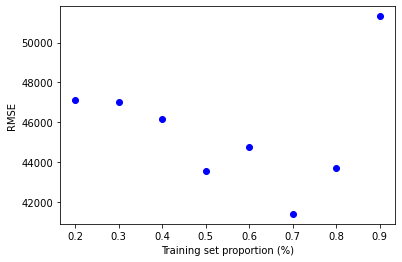

In [45]:
t = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsRegressor(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s, random_state=42)
        knn.fit(X_train, y_train)
        scores.append(sqrt(mean_squared_error(y_test, knn.predict(X_test))))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('RMSE');

We can see that the optimal train test split percentage is 0.7-0.3. 

## Visualizations of models

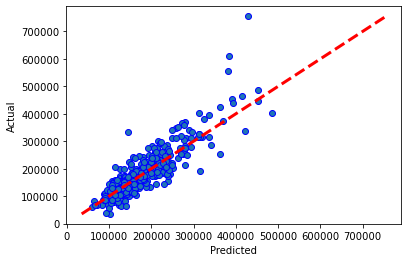

In [55]:
fig, ax = plt.subplots()
ax.scatter(pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()      

We can see that our model performs relatively well. We have vert few outliers.

**K-Fold, GridSearchCV**

In [56]:
from sklearn.model_selection import KFold
kf=KFold(10, shuffle=True)    #I am setting the number of folds to be 10

In [57]:
for train_idx, test_idx in kf.split(X):
    print(train_idx, test_idx)

[   0    1    2 ... 1457 1458 1459] [  56   59   83   91   93   94  100  119  137  156  192  196  197  198
  206  220  226  228  232  236  238  240  241  244  245  259  268  274
  285  290  294  310  318  323  327  338  358  367  371  375  376  379
  384  390  392  396  403  405  407  412  423  425  431  433  434  441
  450  461  462  464  468  471  473  480  513  520  533  539  541  555
  565  583  588  590  591  613  630  634  639  687  707  710  723  724
  725  727  737  751  757  768  774  784  806  809  810  817  820  831
  850  858  859  872  878  921  922  980  982  983  987  996 1011 1012
 1022 1027 1031 1051 1055 1065 1081 1082 1098 1103 1125 1136 1137 1139
 1140 1141 1193 1208 1223 1229 1248 1255 1268 1269 1305 1327 1336 1361
 1363 1390 1397 1414 1431 1438]
[   0    1    2 ... 1457 1458 1459] [  20   25   27   34   36   57   60   68   70   76   77   99  129  159
  160  163  166  172  173  182  218  246  250  252  256  264  265  270
  272  315  316  319  328  372  408  418  42

In [58]:
accuracies=[]
for train_idx, test_idx in kf.split(X):
    X_train, X_test=X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test=y.iloc[train_idx], y.iloc[test_idx]
    
    model=Pipeline(steps=[ 
        ('regression', KNeighborsRegressor())
    ]
    )
    model.fit(X_train, y_train)
    print(sqrt(mean_squared_error(y_test, model.predict(X_test))) )

47789.97452730018
46005.0802444895
40790.93761027326
36634.786048261805
42174.510644986854
38669.49550897844
39693.640970687775
32772.475693354434
30929.04207445749
48177.622391131605


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
model=Pipeline(steps=[ 
        ('regression', KNeighborsRegressor())
])

In [61]:
param_space={ 
    'regression__n_neighbors':range(1,5,1)
}

In [62]:
gridsearch=GridSearchCV(model, param_space, cv=5)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regression', KNeighborsRegressor())]),
             param_grid={'regression__n_neighbors': range(1, 5)})

In [65]:
gridsearch.best_params_   # As we manually found above, we have best performance when number of neighbors equal 3.

{'regression__n_neighbors': 3}

In [66]:
gridsearch.best_estimator_

Pipeline(steps=[('regression', KNeighborsRegressor(n_neighbors=3))])

## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
ln = LinearRegression()

In [69]:
ln.fit(X_train, y_train)

LinearRegression()

In [70]:
pred=ln.predict(X_test)

In [71]:
print("The model performance for testing set")
print("--------------------------------------")
print("MSE is:" ,mean_squared_error(y_test, pred))
print("RMSE is:" ,sqrt(mean_squared_error(y_test, pred)))
print("MAE is:" ,mean_absolute_error(y_test, pred))
print("R2 is:" ,r2_score(y_test, pred))

The model performance for testing set
--------------------------------------
MSE is: 1457546996.43465
RMSE is: 38177.83383633296
MAE is: 25925.994935439747
R2 is: 0.7911253350315469


In [72]:
print("Training RMSE:", sqrt(mean_squared_error(y_train, ln.predict(X_train))))
print("Test RMSE:", sqrt(mean_squared_error(y_test, ln.predict(X_test))))

Training RMSE: 33807.737478056275
Test RMSE: 38177.83383633296


In [73]:
mean_squared_error(np.log(y_test), np.log(pred), squared=False)  #In Kaggle log of RMSE is required to be find

0.22312405451286507

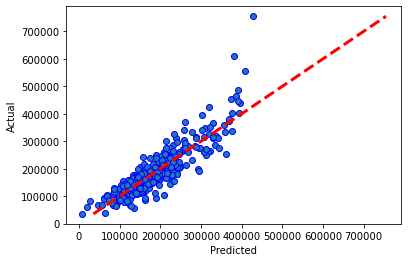

In [74]:
fig, ax = plt.subplots()
ax.scatter(pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()                                  #Evaluation of the model in a form of visualization, we have few outliers or noisy data

In [75]:
from sklearn.model_selection import KFold

In [76]:
kf=KFold(10, shuffle=True)

In [77]:
for train_idx, test_idx in kf.split(X):
    print(train_idx, test_idx)

[   0    1    2 ... 1457 1458 1459] [  11   28   43   47   64   71   73   75   98   99  114  115  120  121
  147  159  163  167  172  181  191  206  211  212  227  232  257  270
  294  308  311  330  341  347  350  351  354  383  392  415  419  421
  424  429  435  436  464  473  494  519  524  525  526  562  572  579
  584  589  623  628  631  632  633  640  654  655  659  672  685  690
  700  714  733  735  737  738  758  761  765  771  790  791  794  804
  812  819  828  836  868  877  887  894  904  944  959  961  969  995
 1020 1025 1033 1064 1070 1072 1076 1080 1100 1107 1113 1128 1133 1137
 1143 1160 1168 1172 1175 1201 1203 1216 1222 1223 1228 1234 1249 1255
 1258 1289 1301 1303 1306 1309 1313 1316 1330 1336 1343 1357 1389 1396
 1405 1413 1433 1436 1439 1456]
[   0    1    2 ... 1457 1458 1459] [  14   48   67   70   74   86   95  102  103  111  140  148  160  169
  178  199  205  207  224  238  239  248  255  273  281  290  295  316
  318  337  346  357  371  374  386  409  43

In [78]:
accuracies=[]
for train_idx, test_idx in kf.split(X):
    X_train, X_test=X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test=y.iloc[train_idx], y.iloc[test_idx]
    
    model=Pipeline(steps=[ 
        ('regression', LinearRegression())
    ]
    )
    model.fit(X_train, y_train)
    print(sqrt(mean_squared_error(y_test, model.predict(X_test))))

1229367428472520.8
39121.558467928895
35417.19769333935
37419.55810314611
37326.033310328334
45340.22101457509
32480.007445241095
28149.813618142725
5.493819787233513e+16
38040.96003291272


In [79]:
HTML(estimator_html_repr(model))

In the above part, I did not setup a pipeline, as I did not have much of complex preprocessing steps. But now, I will recall my dataframe and combine\
all necessary steps under pipeline.

In [80]:
df = pd.read_csv('train.csv')

In [81]:
df=df[['MSSubClass', 'MSZoning', 'LotArea', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt','RoofStyle','Foundation','Heating','HeatingQC','Electrical','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','YrSold', 'SaleType',
       'SaleCondition','SalePrice']] 
#I preferred to choose 26 columns excluding the target column for the model

In [82]:
X = df.drop('SalePrice',axis=1)
y = df["SalePrice"]

In [83]:
X_numeric=X.dtypes[df.dtypes != object].index.to_list()
X_categorical=X.dtypes[df.dtypes == object].index.to_list()

In [84]:
X_categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Foundation',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'SaleType',
 'SaleCondition']

In [85]:
numeric_transformer=Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

categorical_transformer=Pipeline(steps=[
    ('one_hot_encoding', OneHotEncoder()),
    ('imputer', SimpleImputer())
    
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, X_numeric),
    ('categorical', categorical_transformer, X_categorical)
    
])

In [86]:
model=Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('impute', SimpleImputer()), 
        ('regressor', KNeighborsRegressor())
])

In [87]:
param_space={
    'impute__strategy':['most_frequent'],  #As we only have one categorical column which has missing value, we will just use most_frequent strategy. 
    'regressor__n_neighbors':range(3, 8, 13)
}

In [88]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=43)

In [89]:
gridsearch=GridSearchCV(model, param_space, cv=5)

In [90]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
           

In [91]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'BedroomAbvGr',
                                                   'KitchenAbvGr', 'YrSold']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                      

In [92]:
gridsearch.best_params_

{'impute__strategy': 'most_frequent', 'regressor__n_neighbors': 3}